In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Features overview

1. age (numeric)
2.  job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar",           "self-employed","retired","technician","services")
3.  marital : marital status (categorical: "married","divorced","single";
      note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
## related with the last contact of the current campaign:
9. contact: contact communication type (categorical: "unknown","telephone",  "cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
## other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

## Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: "yes","no")




In [ ]:
# Importing necassary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the data
df = pd.read_csv("/content/drive/MyDrive/Customer churn/bank.csv",delimiter=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

# Initial observations

1. The difference between 75% and max of **balance** is very huge,so there are   very few clients whose **balance** is above 1480 (no. of clients:-1129)
2. **Duration** gap between average ,75% and Max is also two high. (no. of clients:-1130)
3. On average a client iś contacted 2-3 times during the **campaign** but there are 965 clients contacted  more than that.
4. Only 816 clients were contacted  before campaign(**previous**)
5. Only 771 were contacted after previous campaign(**pdays**)
6. There are 521 (**yes**) who subscribed and 4000 (**no**'s) who didn't subscribe/churn in **"y"**

# Exploratory data analysis



## Age

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


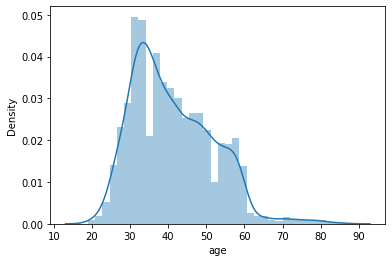

In [ ]:
sns.distplot(df['age'])

In [ ]:
df[df['age'] >60]['y'].value_counts()

no     79
yes    48
Name: y, dtype: int64

If we keep the range upto 60 years than there are 127 people above it and out of them only 48 have subscribed

#job

In [ ]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

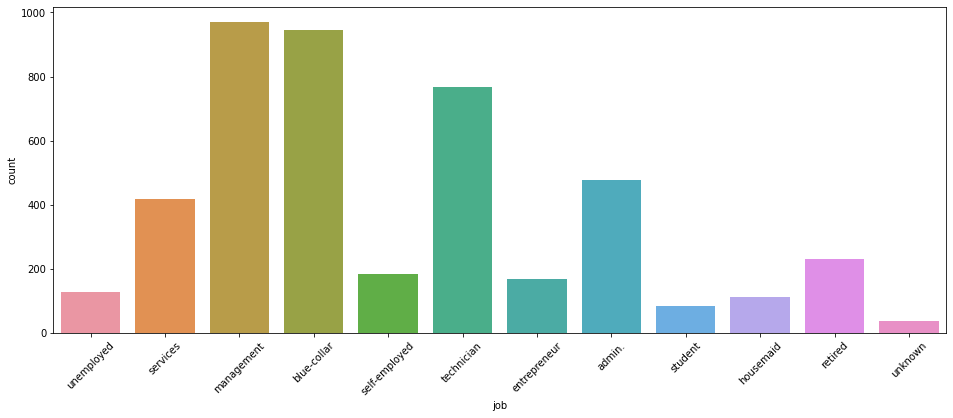

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(df['job'])
plt.xticks(rotation=45)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

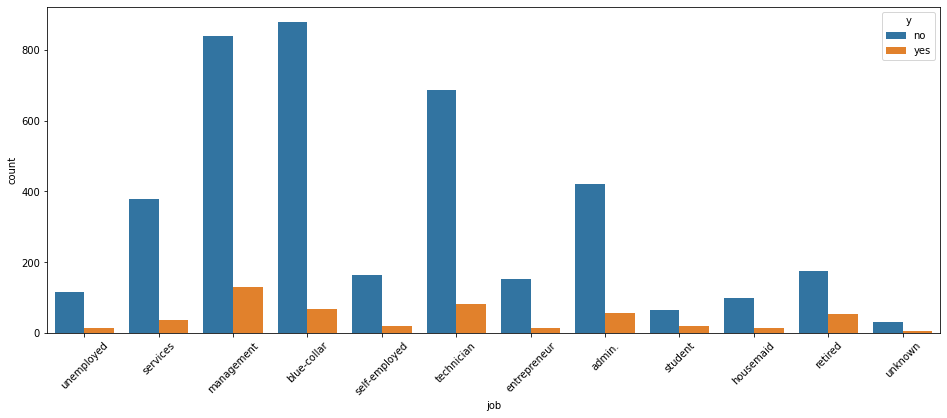

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(df['job'],hue=df['y'])
plt.xticks(rotation=45)

The above figure shows subscription among the job titles

lookinng at it we can say job will be one of deciding feature

# marital

Here we have three types married, single and divorced

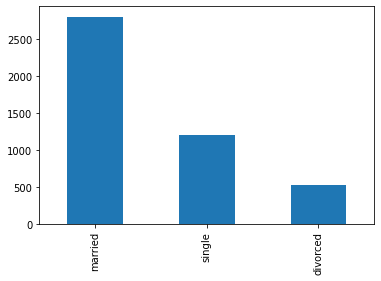

In [ ]:
df['marital'].value_counts().plot(kind='bar')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

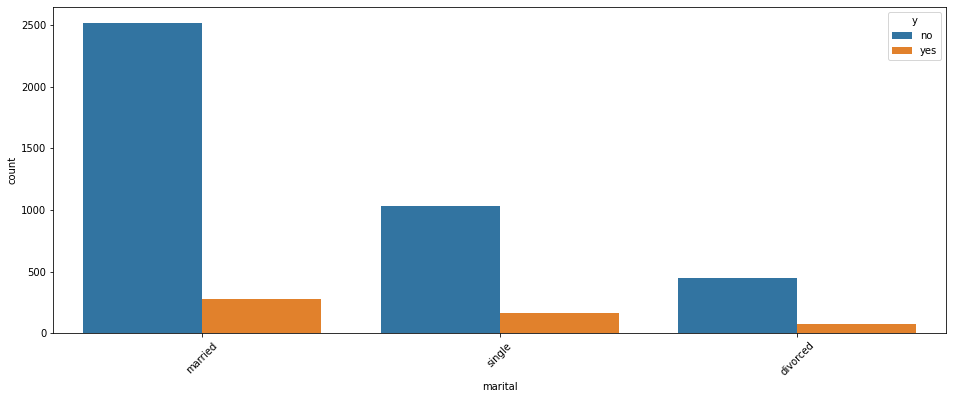

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(df['marital'],hue=df['y'])
plt.xticks(rotation=45)

The above figure shows subscription among the marital status

## education

In [ ]:
df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


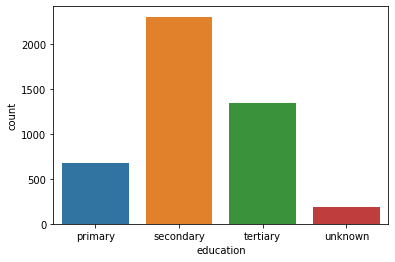

In [ ]:
sns.countplot(df['education'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


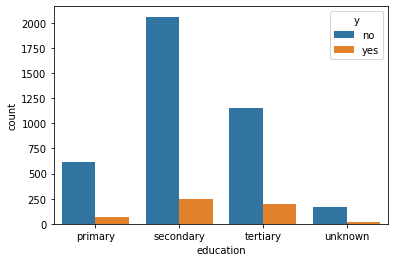

In [ ]:
sns.countplot(df['education'],hue=df['y'])

The above figure shows subscription education wise

## default

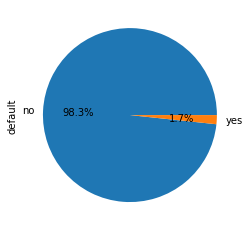

In [ ]:
df['default'].value_counts().plot(kind='pie',autopct='%1.1f%%')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


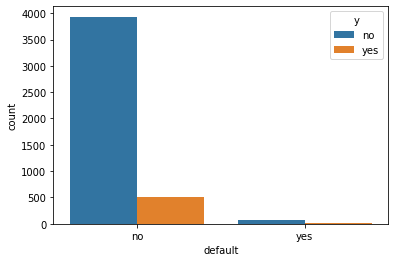

In [ ]:
sns.countplot(df['default'],hue=df['y'])

There are only 17% defaulters in data and most non-defaulters amongst subscribed one's

## balance

In [ ]:
df[df['balance'] <= 1480]['balance']

2       1350
3       1476
4          0
5        747
6        307
        ... 
4516    -333
4517   -3313
4518     295
4519    1137
4520    1136
Name: balance, Length: 3392, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Distribution upto 75th percentile')]

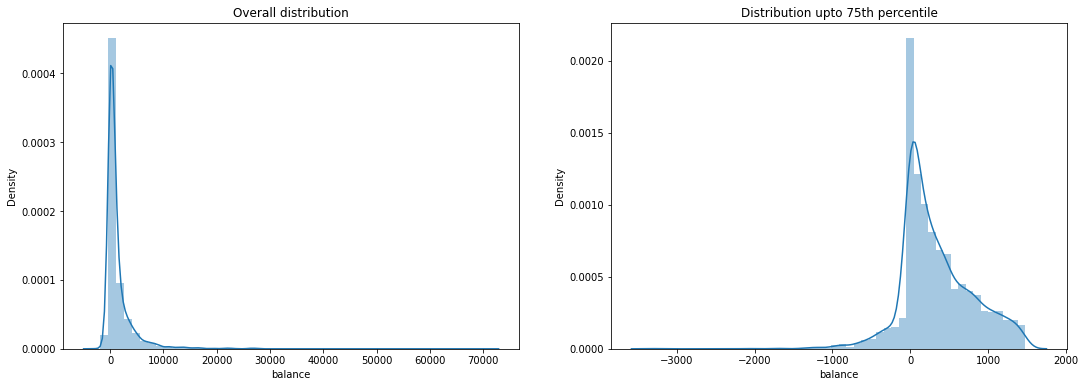

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
sns.distplot(df['balance'],ax=axes[0]).set(title='Overall distribution')
sns.distplot(df[df['balance'] <= 1480]['balance'],ax=axes[1]).set(title='Distribution upto 75th percentile')


There are few high balance accounts with more balance then the 75th percentile and this is hiding the negative balance, but if we plot distribution upto 75th percentile we can see them. shown in above figure

## housing

In [ ]:
df['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


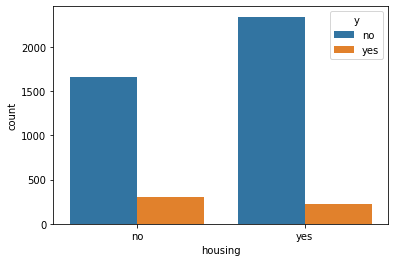

In [ ]:
sns.countplot(df['housing'],hue=df['y'])

The above figure shows subscription along with housing loan

## loan

In [ ]:
df['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


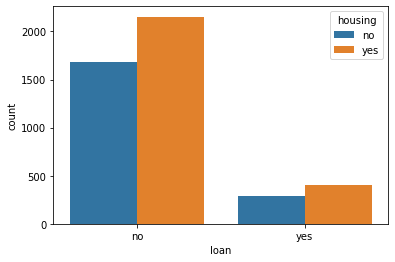

In [ ]:
sns.countplot(df['loan'],hue=df['housing'])

In [ ]:
df[(df['loan'] == 'yes') & (df['housing'] == 'yes')]['y'].value_counts()

no     381
yes     25
Name: y, dtype: int64

There are 406 clients with both housing as well as personal loan and 25 of them have subscribed

## contact

In [ ]:
df['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


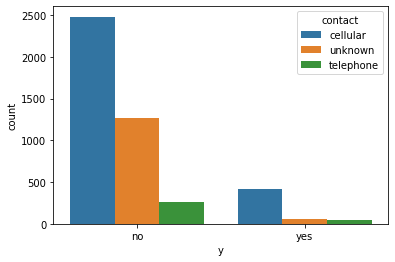

In [ ]:
sns.countplot(df['y'],hue=df['contact'])

In above fig we can see that amongst the subscribed one's majority had an cellular call

## day

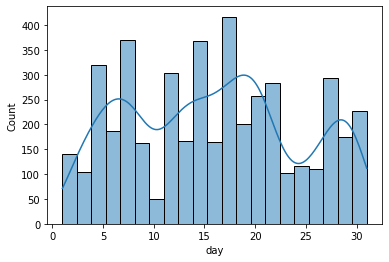

In [ ]:
sns.histplot(df['day'],kde=True)

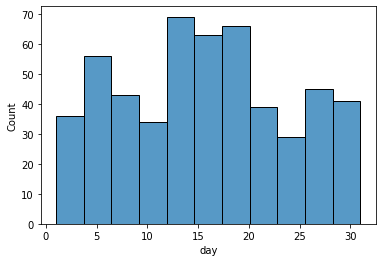

In [ ]:
sns.histplot(df[df['y'] =='yes']['day'])

## month

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


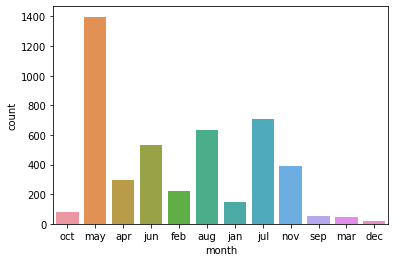

In [ ]:
sns.countplot(df['month'])

May had the maximum number of contacts

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


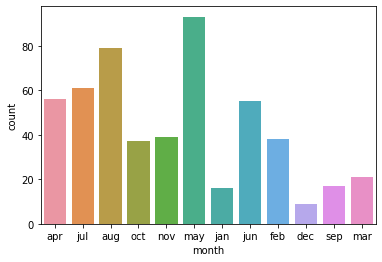

In [ ]:
sns.countplot(df[df['y'] =='yes']['month'])

Most subscribed were also contacted in may

## duration

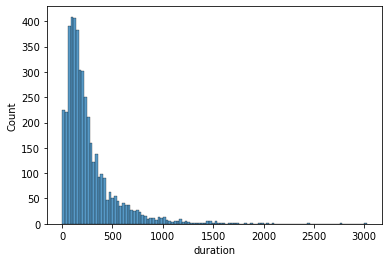

In [ ]:
sns.histplot(df['duration'])

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


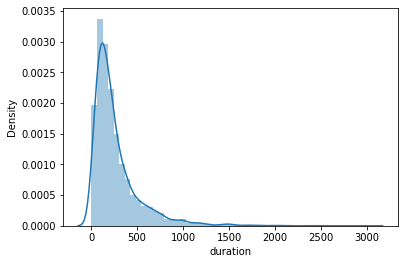

In [ ]:
sns.distplot(df['duration'],kde=True)

The call duration graph is positively skewed

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


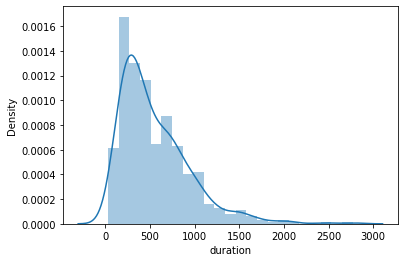

In [ ]:
sns.distplot(df[df['y'] =='yes']['duration'])

## campaign

In [ ]:
df['campaign'].nunique()

32

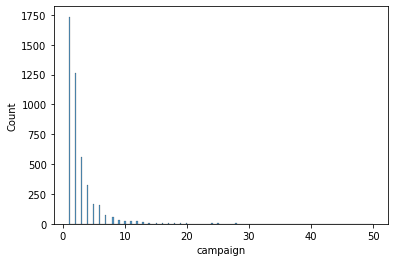

In [ ]:
sns.histplot(df['campaign'])

## pdays

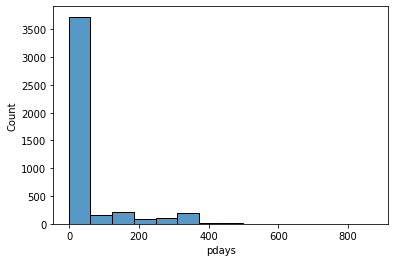

In [ ]:
sns.histplot(df['pdays'])

In [ ]:
df[df['pdays'] == -1]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4513,49,blue-collar,married,secondary,no,322,no,no,cellular,14,aug,356,2,-1,0,unknown,no
4515,32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no


3705 clients were not contacted after previous campaign

## previous

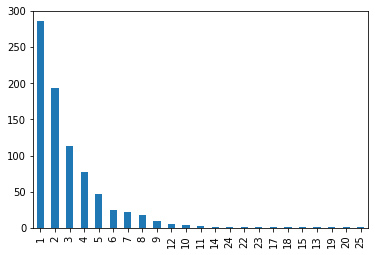

In [ ]:
df[df['previous'] > 0]['previous'].value_counts().plot(kind='bar')

Only 816 clients were contacted before this campaign and most of them were contacted once

## poutcome

In [ ]:
df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


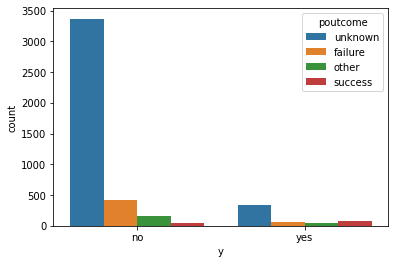

In [ ]:
sns.countplot(df['y'],hue=df['poutcome'])

Most of the subscribe after this campaign were from unknown followed by failure of previous campaign we can see it in above figure

# Data preprocessing

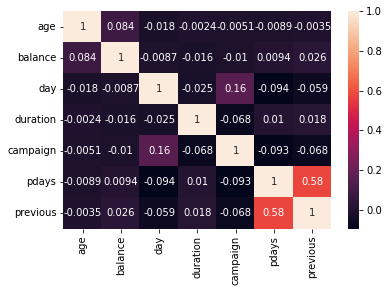

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df['job'].nunique()

12

In [ ]:
# Create a copy of df
df_copy = df.copy()

In [ ]:
df_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
# Converting yes/no columns to binary

df_copy['default'] = df_copy['default'] .map({'yes':1,'no':0})
df_copy['housing'] = df_copy['housing'] .map({'yes':1,'no':0})
df_copy['loan'] = df_copy['loan'] .map({'yes':1,'no':0})
df_copy['y'] = df_copy['y'] .map({'yes':1,'no':0})


In [ ]:
x = df_copy.iloc[:,:-1]
y = df_copy.iloc[:,-1]

In [ ]:
# train test split

from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler

In [ ]:
# Creating an object to perform preprocessing on features onthe go

from sklearn.compose import make_column_transformer
column_trans = make_column_transformer(
    (OneHotEncoder(sparse=False,drop='first'), [1, 2,3,8,10,15]),
    (StandardScaler(),[0,5,9,11,12,13]),
    remainder='passthrough',)

In [ ]:
# chain sequential steps together

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [ ]:
pipe = make_pipeline(column_trans, gbc)

In [ ]:
pipe.fit(x1_train, y1_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [1, 2, 3, 8, 10, 15]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 5, 9, 11, 12, 13])])),
                ('gradientboostingclassifier', GradientBoostingClassifier())])

In [ ]:
pred = pipe.predict(x1_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [ ]:
print(classification_report(y1_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1334
           1       0.59      0.37      0.45       158

    accuracy                           0.91      1492
   macro avg       0.76      0.67      0.70      1492
weighted avg       0.89      0.91      0.90      1492



In [ ]:
cm = confusion_matrix(y1_test,pred)

In [ ]:
y1_test.value_counts()

0    1334
1     158
Name: y, dtype: int64

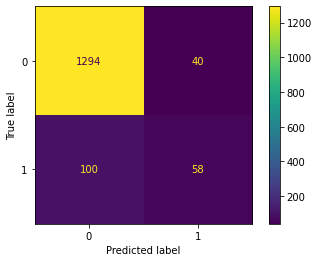

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
disp.plot()

# Using BalancedBaggingClassifier to balance the dataset

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier

In [ ]:
bbc = BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(),sampling_strategy='auto',replacement=False, random_state=7)

In [ ]:
bbc

BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(),
                          random_state=7)

In [ ]:
pipe2 = make_pipeline(column_trans, bbc)

In [ ]:
# !pip install -U imbalanced-learn==0.9.1

In [ ]:
pipe2.fit(x1_train, y1_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [1, 2, 3, 8, 10, 15]),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  [0, 5, 9, 11, 12, 13])])),
                ('balancedbaggingclassifier',
                 BalancedBaggingClassifier(base_estimator=GradientBoostingClassifier(),
                                           random_state=7))])

In [ ]:
pred2 = pipe2.predict(x1_test)

In [ ]:
print(classification_report(y1_test,pred2))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91      1334
           1       0.41      0.83      0.54       158

    accuracy                           0.85      1492
   macro avg       0.69      0.84      0.73      1492
weighted avg       0.92      0.85      0.87      1492



In [ ]:
cm2 = confusion_matrix(y1_test,pred2)

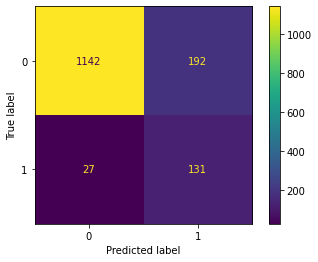

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=pipe.classes_)
disp.plot()